# **Eksplorasi, Persiapan Data, dan Classification**

# **Penjelasan Masalah**

Masalah yang ingin diselesaikan disini adalah algoritma classification mampu melakukan klasifikasi terhadap data pelanggan yang nantinya akan menghasilkan prediksi terhadap data pelanggan sehingga kita dapat mengetahui mana pelanggan yang tertarik untuk membeli kendaraan tersebut.

 ## **Muat File Data**

In [3]:
#import all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from scipy import stats
import sklearn

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/dioapw/school-project-clustering-classification/main/kendaraan_train.csv")
#Reading the dataset in a dataframe using Pandas

df.head(10)  #Print first ten observations

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
5,6,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
6,7,Wanita,33.0,1.0,8.0,0.0,NaN,Pernah,32435.0,124.0,215.0,1
7,8,Pria,23.0,NaN,28.0,1.0,< 1 Tahun,Tidak,26869.0,152.0,222.0,0
8,9,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0
9,10,NaN,54.0,1.0,29.0,0.0,> 2 Tahun,Pernah,88883.0,124.0,28.0,1


## **Eksplorasi Data**

Untuk ikhtisar singkat, kita dapat menggunakan metode dan atribut DataFrame berikut:

In [9]:
df.head() # show first 5 rows

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [10]:
df.tail() # last 5 rows

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0
285830,285831,Pria,45.0,1.0,28.0,0.0,1-2 Tahun,Pernah,36480.0,26.0,44.0,0


In [11]:
df.columns # list all column names

Index(['id', 'Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi',
       'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan',
       'Lama_Berlangganan', 'Tertarik'],
      dtype='object')

In [12]:
df.shape # get number of rows and columns

(285831, 12)

In [13]:
df.info() # additional info about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [14]:
df.describe() # statistical description, only for numeric values

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [15]:
df.value_counts(dropna=False) # count unique values

id      Jenis_Kelamin  Umur  SIM  Kode_Daerah  Sudah_Asuransi  Umur_Kendaraan  Kendaraan_Rusak  Premi    Kanal_Penjualan  Lama_Berlangganan  Tertarik
1       Wanita         30.0  1.0  33.0         1.0             < 1 Tahun       Tidak            28029.0  152.0            97.0               0           1
190553  Wanita         29.0  1.0  28.0         1.0             < 1 Tahun       Tidak            44696.0  152.0            NaN                0           1
190559  Wanita         21.0  1.0  10.0         1.0             NaN             Tidak            37287.0  152.0            116.0              0           1
190558  NaN            29.0  1.0  35.0         1.0             < 1 Tahun       Tidak            28938.0  152.0            73.0               0           1
190557  Wanita         49.0  1.0  3.0          0.0             NaN             NaN              29082.0  124.0            193.0              0           1
                                                                           

### **1. Mengurutkan data**

Berdasarkan Premi terbesar

In [16]:
df.sort_values('Premi',ascending=False).head(10) # Sort the Data frame based on Premi in ascending value and print first 10 observation.

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
139054,139055,Wanita,53.0,1.0,28.0,1.0,1-2 Tahun,Tidak,540165.0,26.0,134.0,0
85234,85235,Pria,47.0,1.0,28.0,0.0,1-2 Tahun,Pernah,540165.0,42.0,NaN,0
279444,279445,Wanita,50.0,1.0,46.0,1.0,1-2 Tahun,NaN,508073.0,26.0,192.0,0
243598,243599,Pria,40.0,1.0,28.0,0.0,1-2 Tahun,Pernah,489663.0,122.0,NaN,1
21500,21501,Pria,50.0,1.0,28.0,0.0,1-2 Tahun,Pernah,472042.0,124.0,14.0,1
15445,15446,Pria,22.0,1.0,28.0,0.0,1-2 Tahun,Pernah,472042.0,163.0,114.0,0
216816,216817,Pria,71.0,1.0,28.0,0.0,> 2 Tahun,Pernah,448156.0,122.0,135.0,0
191272,191273,Wanita,49.0,1.0,28.0,0.0,1-2 Tahun,Pernah,402863.0,122.0,218.0,0
236722,236723,Pria,41.0,1.0,NaN,1.0,NaN,Tidak,402097.0,26.0,106.0,0
9880,9881,Wanita,54.0,1.0,7.0,1.0,1-2 Tahun,Tidak,399010.0,26.0,152.0,0


Berdasarkan Lama berlangganan terbesar

In [17]:
df.sort_values('Lama_Berlangganan', ascending=False).head(10) #Sort the Data frame based on Lama_Berlangganan in ascending value and print first 10 observation.

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
249862,249863,Wanita,25.0,1.0,7.0,1.0,< 1 Tahun,Tidak,50377.0,NaN,299.0,0
139005,139006,Wanita,29.0,1.0,50.0,0.0,< 1 Tahun,Tidak,32239.0,160.0,299.0,0
172191,172192,Pria,22.0,1.0,8.0,1.0,< 1 Tahun,Tidak,37979.0,160.0,299.0,0
220637,220638,Pria,26.0,1.0,36.0,0.0,< 1 Tahun,Tidak,38937.0,152.0,299.0,0
162824,162825,Pria,25.0,1.0,19.0,0.0,< 1 Tahun,Pernah,2630.0,160.0,299.0,0
123492,123493,Pria,56.0,1.0,27.0,0.0,1-2 Tahun,NaN,27553.0,26.0,299.0,1
53451,53452,Pria,46.0,1.0,41.0,0.0,1-2 Tahun,Pernah,33334.0,124.0,299.0,0
272590,272591,Wanita,21.0,1.0,39.0,NaN,< 1 Tahun,Pernah,38499.0,152.0,299.0,0
71453,71454,Pria,32.0,1.0,28.0,1.0,NaN,Tidak,72115.0,152.0,299.0,0
247844,247845,Wanita,25.0,1.0,29.0,1.0,< 1 Tahun,Tidak,32733.0,152.0,299.0,0


### **2. Membuat Plots**

#### A. Histogram

Berdasarkan Umur

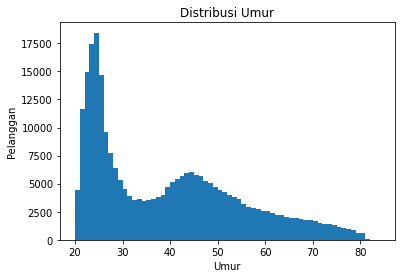

In [18]:
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure
fig=plt.figure()
#Create 3 subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)

#Plot Histogram by age
#Variable
ax.hist(df['Umur'],bins=range(20, 85))
#Labels and Tit
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Pelanggan')
plt.show()

Berdasarkan Premi

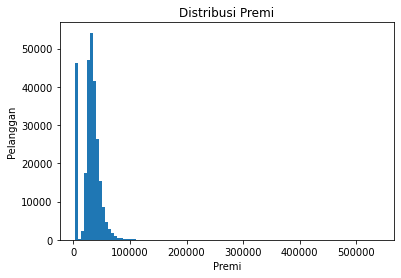

In [19]:
#Plot Histogram by Premi
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure
fig=plt.figure()
#Create 3 subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)

#Variable
ax.hist(df['Premi'],bins=100)
#Labels and Tit
plt.title('Distribusi Premi')
plt.xlabel('Premi')
plt.ylabel('Pelanggan')
plt.show()

Berdasarkan Lama Berlangganan

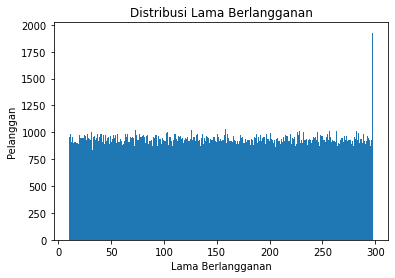

In [20]:
#Plot Histogram by Lama_Berlangganan
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure
fig=plt.figure()
#Create 3 subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)

#Variable
ax.hist(df['Lama_Berlangganan'], bins=range(10, 299))
#Labels and Tit
plt.title('Distribusi Lama Berlangganan')
plt.xlabel('Lama Berlangganan')
plt.ylabel('Pelanggan')
plt.show()

Berdasarkan Kanal Penjualan

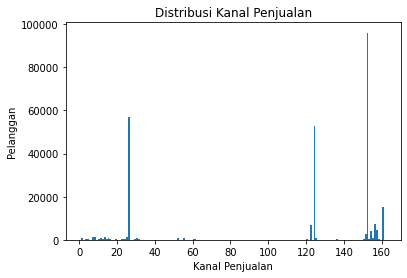

In [21]:
#Plot Histogram by Kanal Penjualan
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure
fig=plt.figure()
#Create 3 subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)

#Variable 
ax.hist(df['Kanal_Penjualan'],bins=range(1, 163))
#Labels and Tit
plt.title('Distribusi Kanal Penjualan')
plt.xlabel('Kanal Penjualan')
plt.ylabel('Pelanggan')
plt.show()

#### B. Scatter Plot

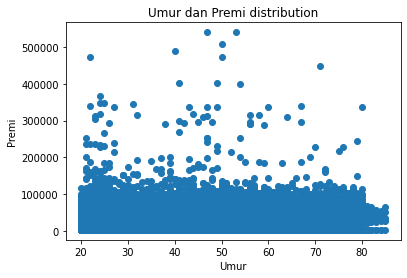

In [22]:
# Scatter Plot based on Age and premi
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure 
fig=plt.figure()
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)

#Variable
ax.scatter(df['Umur'],df['Premi'])
#Labels and Tit
plt.title('Umur dan Premi distribution')
plt.xlabel('Umur')
plt.ylabel('Premi')
plt.show()

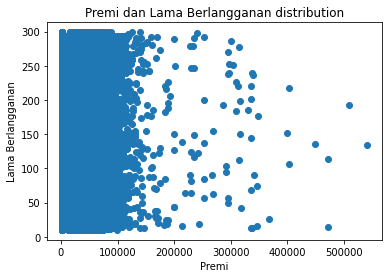

In [23]:
# Scatter Plot based on premi and Lama_Berlangganan
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure 
fig=plt.figure()
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)

#Variable
ax.scatter(df['Premi'],df['Lama_Berlangganan'])
#Labels and Tit
plt.title('Premi dan Lama Berlangganan distribution')
plt.xlabel('Premi')
plt.ylabel('Lama Berlangganan')
plt.show()

#### C. Box-plot

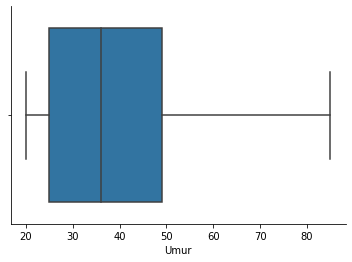

In [24]:
# Box-plot based on age
sns.boxplot(x=df['Umur']) 
sns.despine()

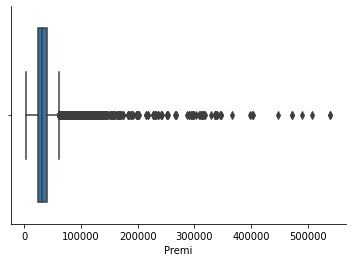

In [25]:
# Box-plot based on Premi
sns.boxplot(x=df['Premi']) 
sns.despine()

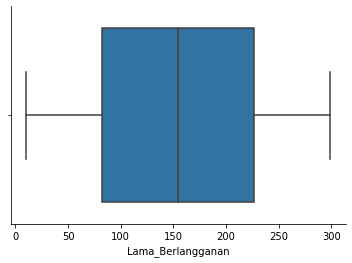

In [26]:
# Box-plot based on Lama_Berlanggan
sns.boxplot(x=df['Lama_Berlangganan']) 
sns.despine()

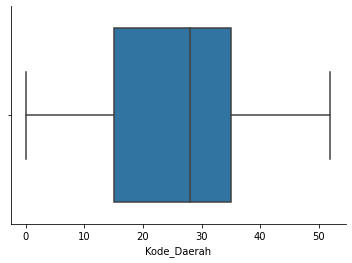

In [27]:
# Box-plot based on Kode_Daerah
sns.boxplot(x=df['Kode_Daerah']) 
sns.despine()

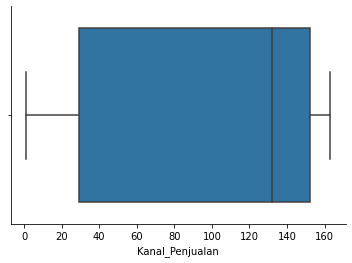

In [28]:
# Box-plot based on Kanal_Penjualan
sns.boxplot(x=df['Kanal_Penjualan']) 
sns.despine()

#### D. Heatmap

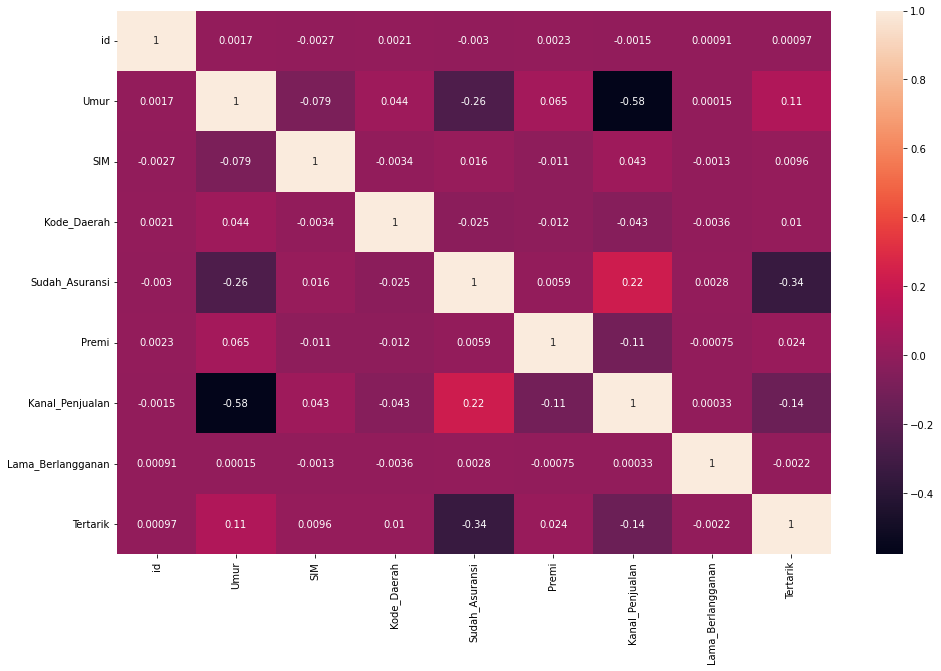

In [29]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

### **3. Korelasi**

In [30]:
df.corr()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,1.000000,0.001729,-0.002658,0.002114,-0.003043,0.002292,-0.001500,0.000913,0.000972
Umur,0.001729,1.000000,-0.079467,0.043603,-0.255006,0.064634,-0.577722,0.000147,0.109888
SIM,-0.002658,-0.079467,1.000000,-0.003359,0.016073,-0.011315,0.043426,-0.001266,0.009588
Kode_Daerah,0.002114,0.043603,-0.003359,1.000000,-0.024533,-0.011887,-0.043216,-0.003639,0.010186
Sudah_Asuransi,-0.003043,-0.255006,0.016073,-0.024533,1.000000,0.005903,0.221767,0.002757,-0.340917
Premi,0.002292,0.064634,-0.011315,-0.011887,0.005903,1.000000,-0.112187,-0.000750,0.023770
Kanal_Penjualan,-0.001500,-0.577722,0.043426,-0.043216,0.221767,-0.112187,1.000000,0.000327,-0.140931
Lama_Berlangganan,0.000913,0.000147,-0.001266,-0.003639,0.002757,-0.000750,0.000327,1.000000,-0.002225
Tertarik,0.000972,0.109888,0.009588,0.010186,-0.340917,0.023770,-0.140931,-0.002225,1.000000


### **4. Hasilkan Tabel Frekuensi**

Berdasarkan Umur dan Sudah asuransi

In [31]:
freq = df.groupby(['Umur','Sudah_Asuransi']) #Group the Data frame based on Umur and Sudah_Asuransi
freq.size()

Umur  Sudah_Asuransi
20.0  0.0               2506
      1.0               1716
21.0  0.0               5118
      1.0               5903
22.0  0.0               5402
                        ... 
83.0  1.0                  9
84.0  0.0                  1
      1.0                  8
85.0  0.0                  6
      1.0                  2
Length: 132, dtype: int64

Berdasarkan Umur dan Premi

In [32]:
freq = df.groupby(['Umur','Premi']) #Group the Data frame based on Umur and Premi
freq.size()

Umur  Premi  
20.0  2630.0     879
      12582.0      1
      12867.0      1
      12947.0      1
      13302.0      1
                ... 
85.0  27057.0      1
      32366.0      1
      34005.0      1
      51045.0      1
      65268.0      1
Length: 192203, dtype: int64

Berdasarkan Umur dan Lama Berlangganan

In [33]:
freq = df.groupby(['Umur','Lama_Berlangganan']) #Group the Data frame based on Umur and Lama_Berlangganan
freq.size()

Umur  Lama_Berlangganan
20.0  10.0                 17
      11.0                 12
      12.0                 12
      13.0                 14
      14.0                  6
                           ..
85.0  147.0                 1
      245.0                 1
      279.0                 1
      290.0                 1
      293.0                 1
Length: 17641, dtype: int64

Berdasarkan Umur dan Kendaraan_Rusak

In [34]:
freq = df.groupby(['Umur','Kendaraan_Rusak']) #Group the Data frame based on Umur and Kendaraan_Rusak
freq.size()

Umur  Kendaraan_Rusak
20.0  Pernah             2412
      Tidak              1749
21.0  Pernah             4903
      Tidak              6188
22.0  Pernah             4941
                         ... 
83.0  Tidak                 9
84.0  Pernah                1
      Tidak                 7
85.0  Pernah                6
      Tidak                 2
Length: 132, dtype: int64

### **5. Mengelompokkan Variabel untuk Menghitung Hitungan, Rata-rata dan Jumlah**

Berdasarkan Jenis_Kelamin, SIM, Umur_Kendaraan, Kendaraan_Rusak dan Sudah_Asuransi

In [35]:
group = df.groupby(['Jenis_Kelamin','SIM','Umur_Kendaraan','Kendaraan_Rusak','Sudah_Asuransi'])
group.describe()

id  \
                                                                   count   
Jenis_Kelamin SIM Umur_Kendaraan Kendaraan_Rusak Sudah_Asuransi            
Pria          0.0 1-2 Tahun      Pernah          0.0               207.0   
                                                 1.0                18.0   
                                 Tidak           0.0                19.0   
                                                 1.0                75.0   
                  > 2 Tahun      Pernah          0.0                21.0   
              1.0 1-2 Tahun      Pernah          0.0             43555.0   
                                                 1.0              2356.0   
                                 Tidak           0.0              4351.0   
                                                 1.0             20334.0   
                  < 1 Tahun      Pernah          0.0             12189.0   
                                                 1.0              1070.0   
                                 Tidak           0.0              2839.0   
                                                 1.0             26514.0   
                  > 2 Tahun      Pernah          0.0              5869.0   
                                                 1.0                12.0   
                                 Tidak           0.0                 1.0   
                                                 1.0                 2.0   
Wanita        0.0 1-2 Tahun      Pernah          0.0                74.0   
                                                 1.0                 6.0   
                                 Tidak           0.0                11.0   
                                                 1.0                32.0   
                  < 1 Tahun      Pernah          0.0                 1.0   
                  > 2 Tahun      Pernah          0.0                 7.0   
              1.0 1-2 Tahun      Pernah          0.0             27006.0   
                                                 1.0              1037.0   
                                 Tidak           0.0              2825.0   
                                                 1.0             14085.0   
                  < 1 Tahun      Pernah          0.0             13481.0   
                                                 1.0              1247.0   
                                 Tidak           0.0              3706.0   
                                                 1.0             34719.0   
                  > 2 Tahun      Pernah          0.0              3344.0   
                                                 1.0                 8.0   
                                 Tidak           0.0                 3.0   
                                                 1.0                 2.0   

                                                                                \
                                                                          mean   
Jenis_Kelamin SIM Umur_Kendaraan Kendaraan_Rusak Sudah_Asuransi                  
Pria          0.0 1-2 Tahun      Pernah          0.0             146765.937198   
                                                 1.0             150037.666667   
                                 Tidak           0.0             167872.473684   
                                                 1.0             150081.186667   
                  > 2 Tahun      Pernah          0.0             136033.428571   
              1.0 1-2 Tahun      Pernah          0.0             142966.042705   
                                                 1.0             140488.799660   
                                 Tidak           0.0             141062.020455   
                                                 1.0             142786.690076   
                  < 1 Tahun      Pernah          0.0             143343.372877   
                                                 1.0             145340.340187   
                                 

## **Pembersihan Data**

### **Hapus nilai duplikat dari variabel dalam Dataframe**

In [37]:
# Find a duplicate rows
duplicateDFRow = df[df.duplicated()]
print(duplicateDFRow)

Empty DataFrame
Columns: [id, Jenis_Kelamin, Umur, SIM, Kode_Daerah, Sudah_Asuransi, Umur_Kendaraan, Kendaraan_Rusak, Premi, Kanal_Penjualan, Lama_Berlangganan, Tertarik]
Index: []


Hal ini menandakan bahwa tidak duplicate value

### **Kenali dan Perlakukan Nilai dan Pencilan yang Hilang**

Hitung nilai hilang

In [38]:
# Identify missing values of dataframe
df.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

Penanganan nilai hilang

In [39]:
#Example to impute missing values
df.dropna(inplace=True) # Using dropna to drop all NaN values in the Dataframe

Hasil setelah penanganan nilai hilang

In [40]:
# Identify missing values of dataframe
df.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

Berdasarkan Boxplot sebelumnya, hanya data premi yang memiliki outliers

In [65]:
Q1= df['Premi'].quantile(0.25)
Q3 = df['Premi'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

print("Upper whisker: ", upper_limit)
print("Lower Whisker: ", lower_limit)

Upper whisker:  60017.0
Lower Whisker:  2425.0


Seperti dibahas sebelumnya, apa pun yang terletak di luar antara 61753,5 dan 1939,5 adalah outlier

Mari kita lihat outlier:

In [42]:
df[(df['Premi'] < lower_limit) | (df['Premi'] > upper_limit)]

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
114,115,Wanita,25.0,1.0,41.0,1.0,< 1 Tahun,Tidak,69212.0,152.0,115.0,0
173,174,Pria,24.0,1.0,28.0,1.0,< 1 Tahun,Tidak,63672.0,152.0,98.0,0
266,267,Wanita,58.0,1.0,8.0,0.0,1-2 Tahun,Pernah,72734.0,124.0,61.0,0
309,310,Wanita,45.0,1.0,28.0,1.0,1-2 Tahun,Pernah,76693.0,26.0,56.0,0
631,632,Pria,65.0,1.0,28.0,0.0,> 2 Tahun,Pernah,62438.0,122.0,253.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285610,285611,Wanita,31.0,1.0,28.0,1.0,< 1 Tahun,Tidak,83027.0,152.0,61.0,0
285684,285685,Wanita,20.0,1.0,36.0,0.0,< 1 Tahun,Pernah,99950.0,160.0,14.0,0
285765,285766,Wanita,78.0,1.0,8.0,0.0,1-2 Tahun,Pernah,77615.0,124.0,50.0,0
285776,285777,Pria,22.0,1.0,46.0,0.0,< 1 Tahun,Pernah,72125.0,152.0,154.0,0


Ini adalah outlier yang berada di luar batas atas dan bawah yang dihitung dengan metode IQR.

Untuk menghapus outlier ini dari set data:

In [66]:
df = df[(df['Premi'] > lower_limit) & (df['Premi'] < upper_limit)]

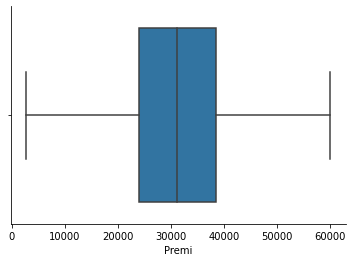

In [67]:
sns.boxplot(x=df['Premi']) 
sns.despine()

### **Hapus kolom yang tidak berguna**

In [45]:
#Penghapusan fitur-fitur yang tidak diperlukan di dataframe
df = df.drop(['id'], axis = 1)
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
5,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0
8,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0
...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165643 entries, 0 to 285830
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Jenis_Kelamin      165643 non-null  object
 1   Umur               165643 non-null  int64 
 2   SIM                165643 non-null  object
 3   Kode_Daerah        165643 non-null  object
 4   Sudah_Asuransi     165643 non-null  object
 5   Umur_Kendaraan     165643 non-null  object
 6   Kendaraan_Rusak    165643 non-null  object
 7   Premi              165643 non-null  int64 
 8   Kanal_Penjualan    165643 non-null  int64 
 9   Lama_Berlangganan  165643 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 13.9+ MB


### **Periksa tipe data yang salah**

In [47]:
df.dtypes # show the datatypes

Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
dtype: object

tipe data kolom Umur, Premi, Kanal_Penjualan dan Lama_Berlangganan harus bilangan bulat bukan float

In [48]:
# convert data type of Umur, Premi, Kanal_Penjualan and Lama_Berlangganan column
# into integer
df.Umur = df.Umur.astype(np.int64)
df.Premi = df.Premi.astype(np.int64)
df.Kanal_Penjualan = df.Kanal_Penjualan.astype(np.int64)
df.Lama_Berlangganan = df.Lama_Berlangganan.astype(np.int64)

# show the datatypes
print(df.dtypes)

Jenis_Kelamin         object
Umur                   int64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                  int64
Kanal_Penjualan        int64
Lama_Berlangganan      int64
dtype: object


Ubah data bertipe string menjadi int

In [49]:
df['Jenis_Kelamin'] = df['Jenis_Kelamin'].replace(['Wanita'], 2)
df['Jenis_Kelamin'] = df['Jenis_Kelamin'].replace(['Pria'], 1)

df['Umur_Kendaraan'] = df['Umur_Kendaraan'].replace(['< 1 Tahun'], 1)
df['Umur_Kendaraan'] = df['Umur_Kendaraan'].replace(['1-2 Tahun'], 2)
df['Umur_Kendaraan'] = df['Umur_Kendaraan'].replace(['> 2 Tahun'], 3)

df['Kendaraan_Rusak'] = df['Kendaraan_Rusak'].replace(['Tidak'], 0)
df['Kendaraan_Rusak'] = df['Kendaraan_Rusak'].replace(['Pernah'], 1)

df.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,2,30,1.0,33.0,1.0,1,0,28029,152,97
1,1,48,1.0,39.0,0.0,3,1,25800,29,158
3,2,58,1.0,48.0,0.0,2,0,2630,124,63
5,1,21,1.0,35.0,1.0,1,0,22735,152,171
8,2,20,1.0,8.0,1.0,1,0,30786,160,31


### **Mengubah data kategorikal menjadi tipe data objek**

In [50]:
# Converting categorical data into object data types
df=df.astype({'Jenis_Kelamin':object, 'SIM': object, 'Sudah_Asuransi': object, 'Kanal_Penjualan': object, 'Kendaraan_Rusak': object})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166396 entries, 0 to 285830
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Jenis_Kelamin      166396 non-null  object
 1   Umur               166396 non-null  int64 
 2   SIM                166396 non-null  object
 3   Kode_Daerah        166396 non-null  object
 4   Sudah_Asuransi     166396 non-null  object
 5   Umur_Kendaraan     166396 non-null  object
 6   Kendaraan_Rusak    166396 non-null  object
 7   Premi              166396 non-null  int64 
 8   Kanal_Penjualan    166396 non-null  int64 
 9   Lama_Berlangganan  166396 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 14.0+ MB


## **Klasifikasi Data**

Kami akan mencoba membangun 4 model berbeda menggunakan algoritma yang berbeda Decision Tree, Random Forest, Naive Bayes, dan K-Nearest Neighbours. Setelah membangun setiap model, kami akan mengevaluasinya dan membandingkan model mana yang terbaik untuk kasus kami. Kami kemudian akan mencoba mengoptimalkan model kami dengan menyetel parameter hiper model dengan menggunakan GridSearch. Terakhir, kami akan menyimpan hasil prediksi dari dataset kami dan kemudian menyimpan model kami untuk digunakan kembali.